# Space X Falcon 9 First Stage Landing  

### In this capstone project, we will predict if the SpaceX Falcon 9 first stage will land successfully using several machine learning classification algorithms. 
#### LogisticRegression,KNN,SVM,DecisionTree algorithms






#### Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\tmost\\Documents\\Data-course\\Space_X'

2. This function is to plot the confusion matrix.(for each model see the output inform of plot after training)

In [3]:
def plot_confusion_matrix(y,y_predict):
    """this function,plot the confusion matrix"""
    from sklearn.metrics import confusion_matrix
    
    cm=confusion_matrix(y, y_predict)
    ax=plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  #annot=True to annotate cells

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land','land']); ax.yaxis.set_ticklabels(['did not land','landed'])

3. Load dataframe

In [4]:
data=pd.read_csv('dataset_falcon9.csv')
data.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


4. Use Pre-processed data

In [5]:
preprocessed=pd.read_csv('preprocessed_dataset_space.csv')
preprocessed.head(3)

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int64  
 4   Reused                               90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int64  
 10  Orbit_GEO                            90 non-null     int64  
 11  Orbit_GTO                         

5. Define X,Y

In [7]:
X= preprocessed.drop('Class',axis=1)
Y= preprocessed['Class']

In [8]:
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,15400.000000,2,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,86,15400.000000,3,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,87,15400.000000,6,1,1,1,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,88,15400.000000,3,1,1,1,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
Y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: Class, Length: 90, dtype: int64

"payloadmass" and "flight columns" have different scale--> we have to standardize them
through "standardized in sklearn"
in some model like KNN,Linear Regression if we dont standardized -> we get big error
for some model like Decision tree it is not that much important
standardscle--> mean=0 and std=1

In [10]:
data['PayloadMass'].mean()

6104.959411764707

In [11]:
data['PayloadMass'].std()

4694.671719712727

In [12]:
data['Flights'].mean()

1.788888888888889

In [13]:
data['Flights'].std()

1.2131715741866367

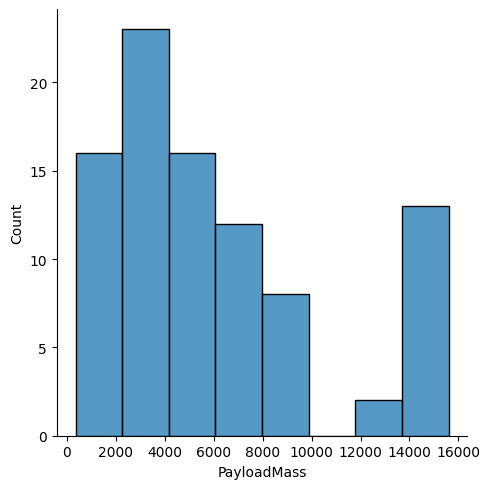

In [14]:
sns.displot(data=X, x="PayloadMass")

## from sklearn import preprocessing to standardized the columns

7.1. Standardized Features

In [15]:
from sklearn.preprocessing import StandardScaler

transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

7.2. Our output is array, in order to work easier we convert it to a dataframe

In [16]:
col=X.columns
X=pd.DataFrame(x_scaled, columns=col)
X

,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.712912,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.674419,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.635927,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.597434,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-1.558942,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.597434,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.635927,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.674419,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


7.3. Check what happened after standardization

In [17]:
X['PayloadMass'].mean()

-1.4186183092432555e-16

In [18]:
X['PayloadMass'].std() #After standardization [mean--> close to 0 and std--> close to 1]

1.0056022847309865

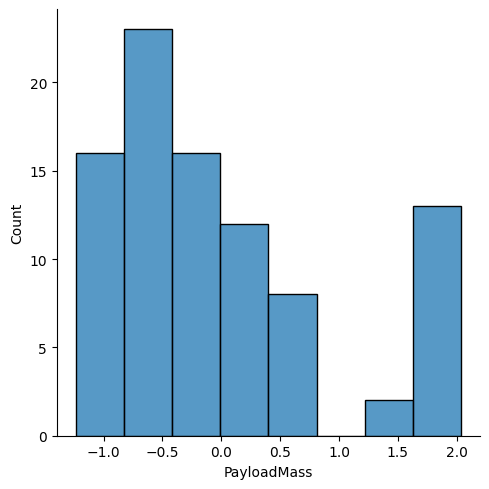

In [19]:
sns.displot(data=X, x='PayloadMass')

8. Train Test Split

In [20]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.30, random_state=101)

# Logistic Regression

In [21]:
lr=LogisticRegression()
parameters ={'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [22]:
print("tuned hyperparameter:(bets parameters)",logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)

tuned hyperparameter:(bets parameters) {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.875


9. create list for collecting results

create two empthy list --> then by append methods, add output of each method to the list

In [23]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,Y_test)

0.8888888888888888

confusion_matrix

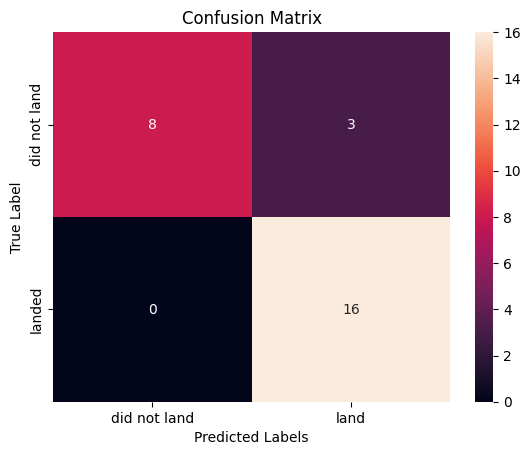

In [24]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Support Vector Machine

In [25]:
svm=SVC()
parameters = {'kernel':['linear', 'rbf','poly','rbf', 'sigmoid'],
              'C': [0.5, 1, 1.5]}

In [26]:
svm_cv=GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1, 1.5],
                         'kernel': ['linear', 'rbf', 'poly', 'rbf', 'sigmoid']})

In [27]:
print('tuned hyperparameters:(best parameters)', svm_cv.best_params_)
print('accuracy',svm_cv.best_score_)

tuned hyperparameters:(best parameters) {'C': 1, 'kernel': 'sigmoid'}
accuracy 0.9380952380952381


In [28]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)

0.8888888888888888

confusion matrix

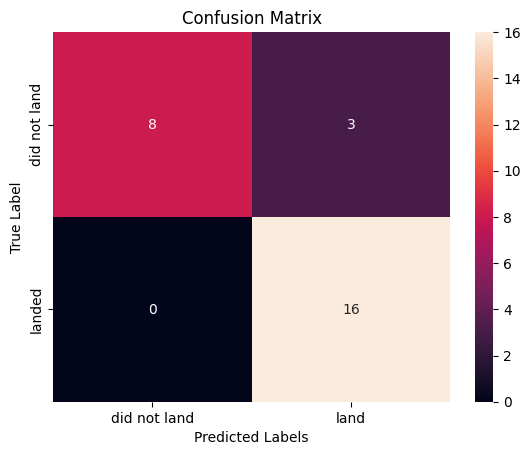

In [29]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Decision Tree

In [30]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [31]:
tree_cv=GridSearchCV(tree,parameters, cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [32]:
print('tuned hyperparameters:(best parameters)', tree_cv.best_params_)
print('accuracy',tree_cv.best_score_)

tuned hyperparameters:(best parameters) {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy 0.9666666666666668


In [33]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.7037037037037037

confusion_matrix

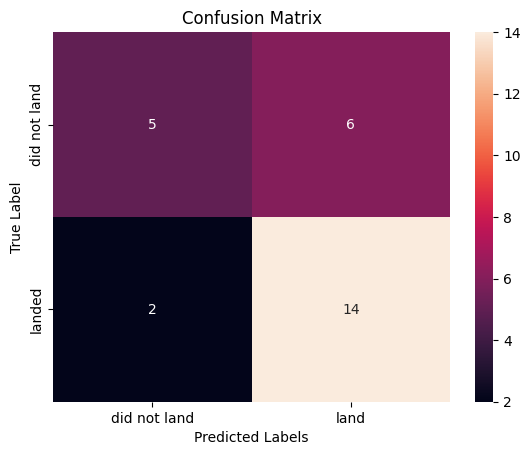

In [34]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# K Nearest Neighbors

In [35]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [36]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [37]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8928571428571429


In [38]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.8518518518518519

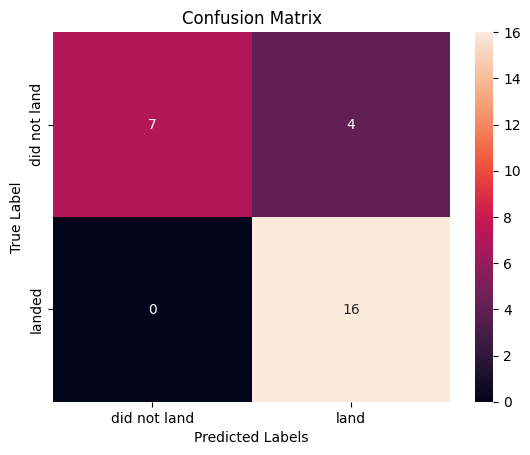

In [39]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

10. The Best Performed Model

In [40]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.8888888888888888, 0.8888888888888888, 0.7037037037037037, 0.8518518518518519]


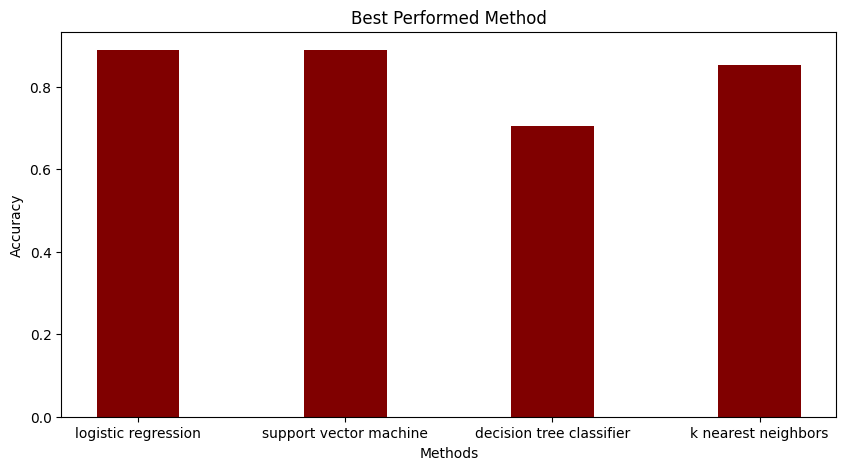

In [41]:
fig=plt.figure(figsize=(10,5))

#creating the bar plot
plt.bar(methods,accu,color='maroon',width=0.4)

plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Best Performed Method')
plt.show()

# SAVE-LOAD the trained model using pickle

In [42]:
import pickle

In [43]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(logreg_cv,f)

11. ROC curve in sklearn

In [44]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'Area under ROC')

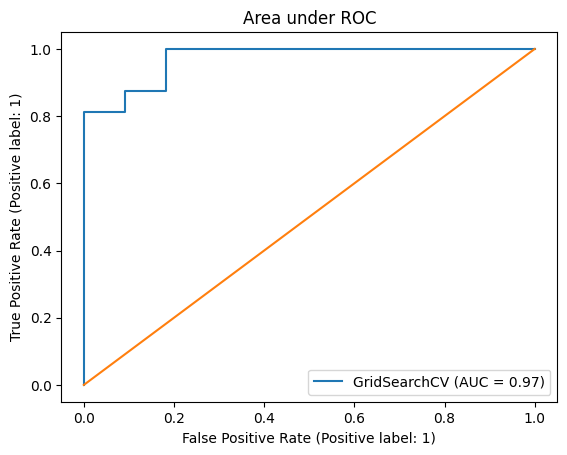

In [46]:
RocCurveDisplay.from_estimator(logreg_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area under ROC')

Text(0.5, 1.0, 'Area under ROC')

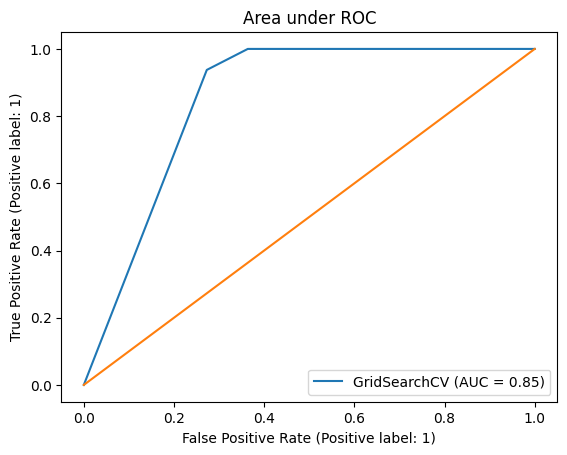

In [45]:
RocCurveDisplay.from_estimator(knn_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area under ROC')

Text(0.5, 1.0, 'Area under ROC')

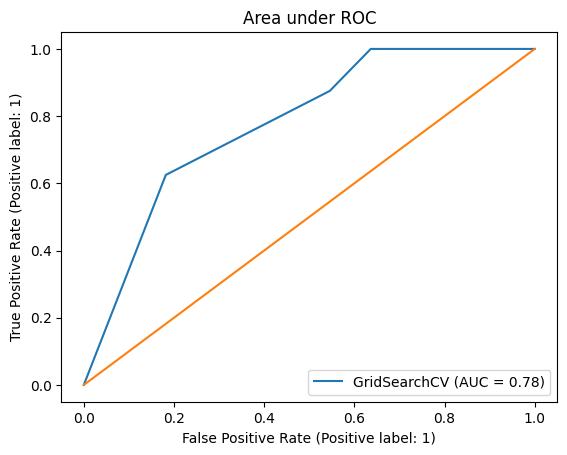

In [47]:
RocCurveDisplay.from_estimator(tree_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area under ROC')

Text(0.5, 1.0, 'Area under ROC')

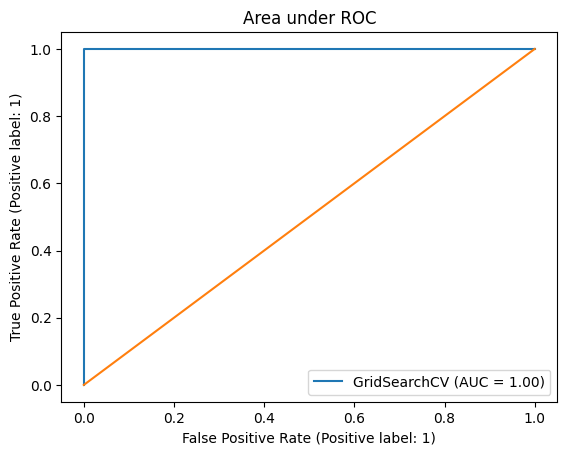

In [48]:
RocCurveDisplay.from_estimator(svm_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area under ROC')

## Discussion

From the data visualization section, we can see that some features may have correlated with the mission outcome in several ways. For example, with heavy payloads, the successful landing or positive landing rate is more for orbit types Polar, LEO and ISS. However, for GTO, we cannot distinguish this well as both positive landing rate, and negative landing(unsuccessful mission) are both there here.
Therefore, each feature may have a certain impact on the final mission outcome. The exact ways of how each of these features impacts the mission outcome are difficult to decipher. However, we can use some machine learning algorithms to learn the pattern of past data and predict whether a mission will be successful or not based on the given 


# Conclusion

In this project, we try to predict if the first stage of a given Falcon 9 launch will land in order to determine the cost of a launch. Each feature of a Falcon 9 launch, such as its payload mass or orbit type, may affect the mission outcome in a certain way.
Several machine learning algorithms are employed to learn the patterns of past Falcon 9 launch data to produce predictive models that can be used to predict the outcome of a Falcon 9 launch. The predictive model produced by the decision tree algorithm performed the best among the four machine learning algorithms employed.
